In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='whitegrid')
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
data = pd.read_csv('sample_of_lending_club_from_population.csv')

In [5]:
print("The total number of records in the data is ",data.shape[0])
print("The total number of features in the data is ",data.shape[1])

The total number of records in the data is  237635
The total number of features in the data is  145


In [6]:
data = data.drop(['Unnamed: 0'],1)

In [7]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,16600.0,16600.0,16600.00000,60 months,15.96,403.33,C,C5,Coventry Health Care,10+ years,RENT,40000.0,Not Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 11/23/11 > Debt consolidat...,debt_consolidation,PAYOFF,219xx,MD,13.17,0.0,Feb-01,3.0,NaN,NaN,13.0,0.0,15964.0,65.10%,24.0,f,0.0,0.0,20516.056550,20516.06,16600.0,3916.06,0.0,0.0,0.0,Aug-13,12863.34,NaN,Nov-13,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,14500.0,14500.0,14500.00000,60 months,10.00,308.09,B,B2,Wells -Fargo Bank,10+ years,MORTGAGE,77400.0,Not Verified,Jan-11,Fully Paid,n,NaN,NaN,debt_consolidation,YK Consolidation,562xx,MN,12.28,0.0,May-80,0.0,NaN,NaN,12.0,0.0,17088.0,23.70%,26.0,f,0.0,0.0,17458.544490,17458.54,14500.0,2958.54,0.0,0.0,0.0,Sep-13,8226.76,NaN,Apr-18,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,25000.0,25000.0,25000.00000,60 months,12.69,564.87,B,B5,Federal Energy Regulatory Commission,< 1 year,RENT,87300.0,Verified,Nov-11,Fully Paid,n,NaN,NaN,wedding,Engagement & Wedding Expenses,208xx,MD,4.15,0.0,Aug-00,2.0,41.0,

In [8]:
data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
237630,NaN,NaN,4900.0,4900.0,4625.0,36 months,11.31,161.15,B,B3,patient representative,8 years,ANY,35000.0,Verified,Feb-19,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,068xx,CT,31.28,0.0,Oct-06,1.0,57.0,NaN,13.0,0.0,7142.0,18.60%,21.0,f,4551.84,4296.38,480.37,453.41,348.16,132.21,0.0,0.0,0.0,May-19,161.15,Jun-19,May-19,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,30369.0,2.0,3.0,2.0,4.0,5.0,23227.0,74.0,1.0,4.0,2586.0,43.0,38500.0,5.0,0.0,3.0,8.0,2336.0,23693.0,20.8,0.0,0.0,95.0,148.0,5.0,5.0,0.0,5.0,57.0,5.0,57.0,0.0,4.0,6.0,6.0,7.0,7.0,10.0,14.0,6.0,13.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,69943.0,30369.0,29900.0,31443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
237631,NaN,NaN,14400.0,14400.0,14400.0,60 months,13.56,331.79,C,C1,Registered Nurse,1 year,MORTGAGE,70000.0,Source Verified,Feb-19,Current,n,NaN,NaN,credit_card,Credit card refinancing,767xx,TX,23.25,0.0,Jul-07,0.0,NaN,NaN,22.0,0.0,18534.0,40.80%,38.0,w,13887.04,13887.04,984.52,984.52,512.96,471.56,0.0,0.0,0.0,May-19,331.79,Jun-19,May-19,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,194425.0,2.0,7.0,1.0,2.0,9.0,32365.0,82.0,2.0,3.0,5008.0,60.0,45400.0,1.0,0.0,1.0,8.0,9258.0,10728.0,46.9,0.0,0.0,109.0,139.0,4.0,4.0,3.0,4.0,NaN,9.0,NaN,0.0,7.0,12.0,7.0,8.0,15.0,14.0,20.0,12.0,22.0,0.0,0.0,0.0,3.0,100.0,14.3,0.0,0.0,231685.0,50899.0,20200.0,39712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
237632,NaN,NaN,5000.0,5000.0,5000.0,36 months,11.02,163.75,B,B2,OWNER,10+ years,MORTGAGE,53000.0,Not Verified,Feb-19,Current,n,NaN,NaN,debt_consolidation,Debt consolidatio

In [9]:
data.duplicated().sum()

0

In [10]:
data['loan_status'].value_counts()

Fully Paid                                             114157
Current                                                 91660
Charged Off                                             28261
Late (31-120 days)                                       2142
In Grace Period                                           686
Late (16-30 days)                                         448
Does not meet the credit policy. Status:Fully Paid        202
Does not meet the credit policy. Status:Charged Off        78
Default                                                     1
Name: loan_status, dtype: int64

> From the lending club website description
* Fully Paid is those who repay the loan on time which is good_borrower
* Where as Current describes about the people who are applied loan from of the lending club
* Remaing all the categories tells about how they violate the policies
* 1988 of Does not meet credit policy and Fully paid are also bad customer they repaid the loan completely but still they affect the policies by doesn't paying loan on time

> We have to bucket them into three categories which is 
* good or potential borrower
* current borrower
* bad borrower

In [11]:
data = data.dropna(axis=1,how='all')   #remove entire null values

In [12]:
data.shape

(237635, 141)

In [13]:
def target_converter(x):
    if x == 'Fully Paid':
        return 'non_risky_borrower'
    elif x == 'Current':
        return 'current_borrower'
    else:
        return 'risky_borrower'

In [14]:
data['loan_status'] = data['loan_status'].apply(target_converter)

#New Value counts for target column
data['loan_status'].value_counts()

non_risky_borrower    114157
current_borrower       91660
risky_borrower         31818
Name: loan_status, dtype: int64

In [15]:
data.isnull().sum()

loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      18724
emp_length                                     15871
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
desc                                          224994
purpose                                            0
title                                         

In [16]:
data.nunique()

loan_amnt                                       1513
funded_amnt                                     1513
funded_amnt_inv                                 2441
term                                               2
int_rate                                         631
installment                                    43966
grade                                              7
sub_grade                                         35
emp_title                                      84249
emp_length                                        11
home_ownership                                     6
annual_inc                                     17785
verification_status                                3
issue_d                                          142
loan_status                                        3
pymnt_plan                                         2
desc                                           12594
purpose                                           14
title                                         

In [17]:
data.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237635 entries, 0 to 237634
Data columns (total 141 columns):
loan_amnt                                     237635 non-null float64
funded_amnt                                   237635 non-null float64
funded_amnt_inv                               237635 non-null float64
term                                          237635 non-null object
int_rate                                      237635 non-null float64
installment                                   237635 non-null float64
grade                                         237635 non-null object
sub_grade                                     237635 non-null object
emp_title                                     218911 non-null object
emp_length                                    221764 non-null object
home_ownership                                237635 non-null object
annual_inc                                    237635 non-null float64
verification_status                           237635 n

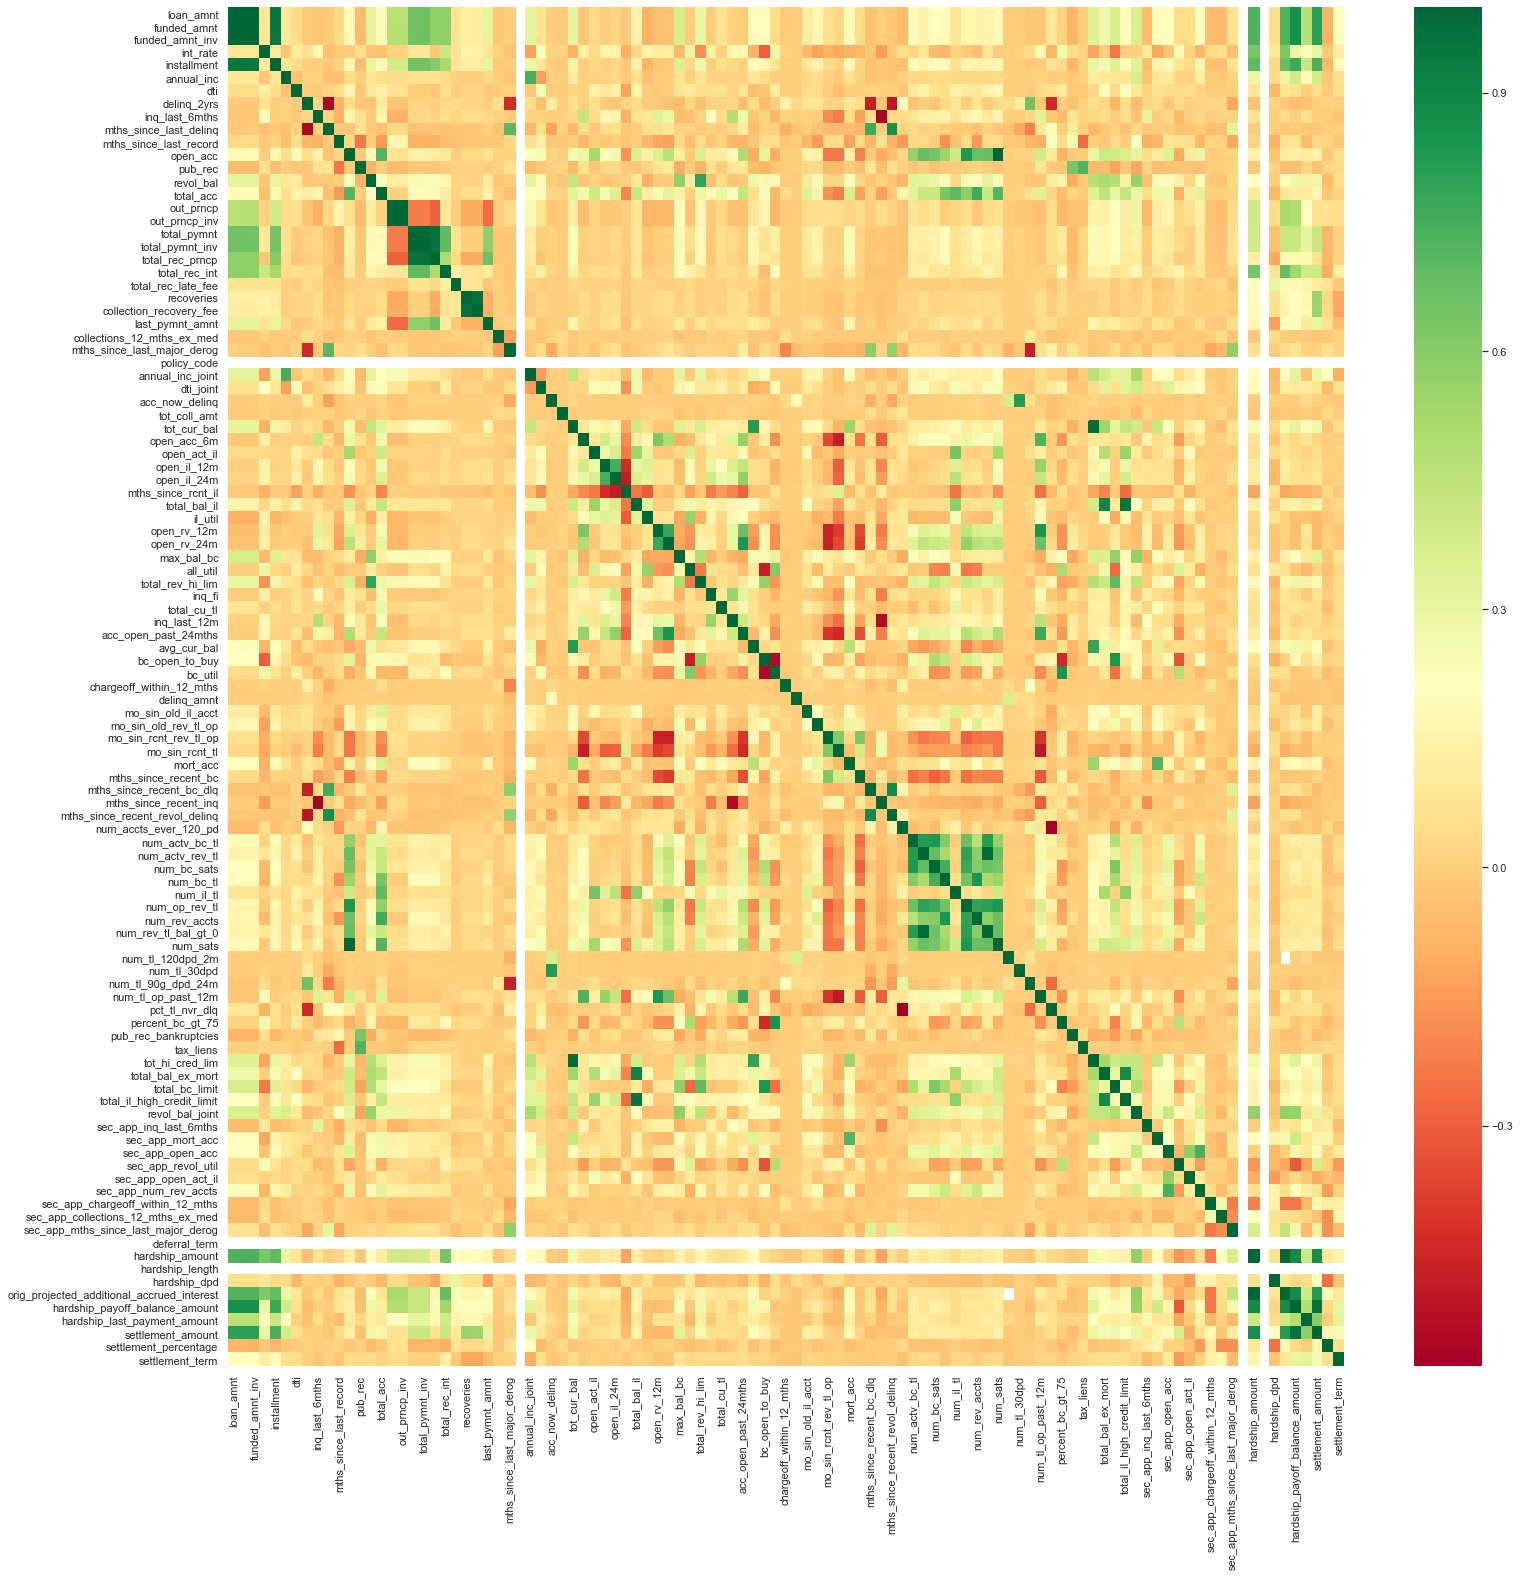

In [18]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),cmap='RdYlGn')

In [19]:
col_corr = data.columns
corr_matrix = data.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (abs(corr_matrix.iloc[i, j] )>= 0.90):
            colname1 = corr_matrix.columns[i] # getting the name of column
            colname2 = corr_matrix.index[j] # getting the name of column
            print(colname1,"<>",colname2)
            print(corr_matrix.iloc[i, j])
            print("="*30)

funded_amnt <> loan_amnt
0.999784269822846
funded_amnt_inv <> loan_amnt
0.9990409281716429
funded_amnt_inv <> funded_amnt
0.9993294686948533
installment <> loan_amnt
0.9449946236987659
installment <> funded_amnt
0.945307690001097
installment <> funded_amnt_inv
0.9444694800748911
out_prncp_inv <> out_prncp
0.9999989781473386
total_pymnt_inv <> total_pymnt
0.9994046903378128
total_rec_prncp <> total_pymnt
0.9666737739940349
total_rec_prncp <> total_pymnt_inv
0.9660554278704337
collection_recovery_fee <> recoveries
0.9641612056528925
num_rev_tl_bal_gt_0 <> num_actv_rev_tl
0.9836057957135936
num_sats <> open_acc
0.9989137450244411
tot_hi_cred_lim <> tot_cur_bal
0.9756979173792913
total_bal_ex_mort <> total_bal_il
0.905703147685653
total_il_high_credit_limit <> total_bal_il
0.9531804891607267
orig_projected_additional_accrued_interest <> hardship_amount
0.999999999999999
settlement_amount <> hardship_payoff_balance_amount
0.9680438318061031


> * loan_amnt is highly correlated with both funded_amnt and funded_amnt_inv so we consider only **funded_amnt**. We know that monthly insatllmnet is highly correlated with loan_amout we know intrest rate and period so monthly installment is removed from the table(drop installment too)
* Then out_prncp_inv are highly correlated out_prncp so we keep only **out_prncp** (remaining principal for total amount funded and inv we already droped funded_inv
* we keep **total_pymnt** and we have to drop both total_pymnt_inv and total_rec_prncp
* we keep **recoveries** and drop collection_recovery_fee
* we keep **num_actv_rev_tl** and drop num_rev_tl_bal_gt_0
* we keep **open_acc** and drop num_sats
* we keep **tot_hi_cred_lim** and drop total_cur_bal same null values but unique is less in tot_hi_cred_lim
* we keep **total_bal_il** and drop total_bal_ex_mort and total_il_high_credit_limit
* we keep **hardship amount** and drop orig_projected_additional_accured_intres (it is null for when hardship_status is broken) so we have treat them as zero
* we going to keep **settlement_amount** and drop hardship_payoff_balnce_amount

### Drop redudant columns (highly correlated - additional information):

In [20]:
data = data.drop(['loan_amnt','funded_amnt_inv','installment','out_prncp_inv','total_pymnt_inv','total_rec_prncp',
                  'collection_recovery_fee','num_rev_tl_bal_gt_0','num_sats','tot_cur_bal','total_bal_ex_mort',
                  'total_il_high_credit_limit','orig_projected_additional_accrued_interest',
                  'hardship_payoff_balance_amount','initial_list_status','zip_code','policy_code','sub_grade','last_pymnt_d',
                  'emp_title','issue_d','title','earliest_cr_line','last_credit_pull_d'],1)

In [21]:
data.shape

(237635, 117)

In [22]:
data['hardship_status'] = data['hardship_status'].fillna('NONE')

In [23]:
data.hardship_status.value_counts()

NONE         236478
COMPLETED       856
BROKEN          230
ACTIVE           71
Name: hardship_status, dtype: int64

In [24]:
data['mths_since_last_delinq'] = data['mths_since_last_delinq'].fillna(data['mths_since_last_delinq'].median())

In [25]:
#checking null values
total_null_values = data.isnull().sum().sort_values(ascending=False)
null_values_percentage = data.isnull().sum()/data.isnull().count()*100
dtype = data.dtypes

# Creating a data frame:
df_miss = pd.concat([total_null_values,null_values_percentage,dtype],axis=1,
                    keys =["Total Missing Values", "Percentage","Data-Types"]).sort_values(by ="Percentage",ascending = False)

#sort them based on highest percentage
top_mis = df_miss[df_miss["Percentage"]>50]     #100% null values
top_mis.reset_index(inplace=True)
top_mis

,index,Total Missing Values,Percentage,Data-Types
0,hardship_type,236478,99.513119,object
1,hardship_loan_status,236478,99.513119,object
2,hardship_last_payment_amount,236478,99.513119,float64
3,hardship_end_date,236478,99.513119,object
4,hardship_dpd,236478,99.513119,float64
5,hardship_amount,236478,99.513119,float64
6,hardship_reason,236478,99.513119,object
7,hardship_start_date,236478,99.513119,object
8,deferral_term,236478,99.513119,float64
9,hardship_length,236478,99.513119,float64


### Droping above 60% null values and those are not potential ones also

In [26]:
data = data.drop(['hardship_dpd', 'hardship_end_date',
       'hardship_last_payment_amount', 'hardship_length',
       'hardship_loan_status', 'hardship_reason', 'hardship_start_date',
       'payment_plan_start_date', 'deferral_term', 'hardship_amount',
       'hardship_type', 'debt_settlement_flag_date', 'settlement_term',
       'settlement_date', 'settlement_percentage', 'settlement_amount',
       'settlement_status', 'sec_app_mths_since_last_major_derog',
       'sec_app_revol_util', 'sec_app_open_act_il', 'revol_bal_joint',
       'sec_app_open_acc', 'sec_app_num_rev_accts', 'sec_app_mort_acc',
       'sec_app_chargeoff_within_12_mths', 'sec_app_inq_last_6mths',
       'sec_app_earliest_cr_line', 'sec_app_collections_12_mths_ex_med',
       'desc', 'verification_status_joint', 'annual_inc_joint',
       'dti_joint', 'mths_since_last_record', 'mths_since_recent_bc_dlq',
       'mths_since_last_major_derog', 'mths_since_recent_revol_delinq',
       'next_pymnt_d'],1)

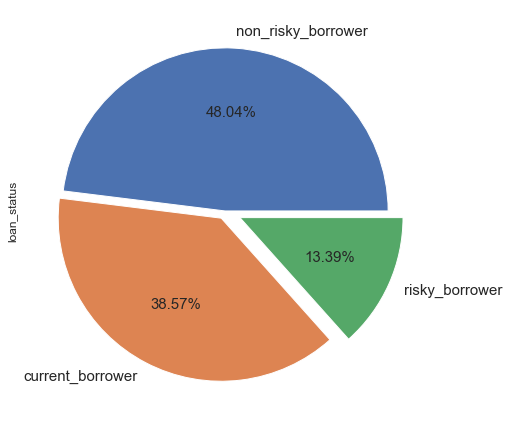

In [27]:
data.loan_status.value_counts().plot(kind='pie',figsize=(15,7.5),autopct='%1.2f%%',fontsize=15,explode=[0,0.05, 0.1])

### Dropping entire rows if the column has less than 10 percent null values 

In [28]:
#checking null values
total_null_values = data.isnull().sum().sort_values(ascending=False)
null_values_percentage = data.isnull().sum()/data.isnull().count()*100
dtype = data.dtypes

# Creating a data frame:
df_miss = pd.concat([total_null_values,null_values_percentage,dtype],axis=1,
                    keys =["Total Missing Values", "Percentage","Data-Types"]).sort_values(by ="Percentage",ascending = False)

#sort them based on highest percentage
top_mis = df_miss[df_miss["Percentage"]>0]     #100% null values
top_mis.reset_index(inplace=True)
top_mis

,index,Total Missing Values,Percentage,Data-Types
0,il_util,108853,45.806805,float64
1,mths_since_rcnt_il,91326,38.431208,float64
2,all_util,86629,36.454647,float64
3,open_rv_24m,86599,36.442022,float64
4,open_il_12m,86599,36.442022,float64
5,open_il_24m,86599,36.442022,float64
6,max_bal_bc,86599,36.442022,float64
7,open_rv_12m,86599,36.442022,float64
8,open_act_il,86599,36.442022,float64
9,inq_last_12m,86599,36.442022,float64


In [29]:
top_mis['index'].values[15:]

array(['emp_length', 'num_tl_120dpd_2m', 'mo_sin_old_il_acct', 'bc_util',
       'percent_bc_gt_75', 'bc_open_to_buy', 'mths_since_recent_bc',
       'pct_tl_nvr_dlq', 'avg_cur_bal', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_bc_tl', 'mo_sin_rcnt_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'total_rev_hi_lim', 'num_il_tl',
       'num_actv_rev_tl', 'tot_hi_cred_lim', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_old_rev_tl_op', 'tot_coll_amt', 'num_bc_sats',
       'total_bc_limit', 'mort_acc', 'acc_open_past_24mths', 'dti',
       'revol_util', 'pub_rec_bankruptcies', 'chargeoff_within_12_mths',
       'collections_12_mths_ex_med', 'tax_liens', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'open_acc', 'inq_last_6mths', 'delinq_2yrs',
       'delinq_amnt'], dtype=object)

In [30]:
data = data.dropna(axis=0,subset=['emp_length', 'num_tl_120dpd_2m', 'mo_sin_old_il_acct', 'bc_util',
       'percent_bc_gt_75', 'bc_open_to_buy', 'mths_since_recent_bc',
       'pct_tl_nvr_dlq', 'avg_cur_bal', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_bc_tl', 'mo_sin_rcnt_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'total_rev_hi_lim', 'num_il_tl',
       'num_actv_rev_tl', 'tot_hi_cred_lim', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_old_rev_tl_op', 'tot_coll_amt', 'num_bc_sats',
       'total_bc_limit', 'mort_acc', 'acc_open_past_24mths', 'dti',
       'revol_util', 'pub_rec_bankruptcies', 'chargeoff_within_12_mths',
       'collections_12_mths_ex_med', 'tax_liens', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'open_acc', 'inq_last_6mths', 'delinq_2yrs',
       'delinq_amnt'])

In [31]:
data.isnull().sum()

funded_amnt                       0
term                              0
int_rate                          0
grade                             0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
loan_status                       0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
mths_since_last_delinq            0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
out_prncp                         0
total_pymnt                       0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
last_pymnt_amnt                   0
collections_12_mths_ex_med  

In [32]:
data = data.fillna(0)

In [33]:
df = data[data['loan_status']!='current_borrower']
df_current = data[data['loan_status']=='current_borrower']

In [34]:
print(data.shape)
print(df.shape)
print(df_current.shape)

(198492, 80)
(120247, 80)
(78245, 80)


In [35]:
df['loan_status'].value_counts(normalize=True)*100

non_risky_borrower    78.874317
risky_borrower        21.125683
Name: loan_status, dtype: float64

> This is a class imbalance problem

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120247 entries, 4254 to 237577
Data columns (total 80 columns):
funded_amnt                   120247 non-null float64
term                          120247 non-null object
int_rate                      120247 non-null float64
grade                         120247 non-null object
emp_length                    120247 non-null object
home_ownership                120247 non-null object
annual_inc                    120247 non-null float64
verification_status           120247 non-null object
loan_status                   120247 non-null object
pymnt_plan                    120247 non-null object
purpose                       120247 non-null object
addr_state                    120247 non-null object
dti                           120247 non-null float64
delinq_2yrs                   120247 non-null float64
inq_last_6mths                120247 non-null float64
mths_since_last_delinq        120247 non-null float64
open_acc                      1

In [37]:
df['term'] = df['term'].replace([' 36 months', ' 60 months'],[36,60])
df_current['term'] = df_current['term'].replace([' 36 months', ' 60 months'],[36,60])

In [38]:
df['emp_length'] = df['emp_length'].replace(['10+ years', '6 years', '< 1 year', '2 years', '4 years',
       '9 years', '5 years', '3 years', '7 years', '1 year', '8 years'],[10,6,0,2,4,9,5,3,7,1,8])
df_current['emp_length'] = df_current['emp_length'].replace(['10+ years', '6 years', '< 1 year', '2 years', '4 years',
       '9 years', '5 years', '3 years', '7 years', '1 year', '8 years'],[10,6,0,2,4,9,5,3,7,1,8])

In [39]:
df.grade = df.grade.astype('category')
df_current.grade = df_current.grade.astype('category')

In [40]:
df.home_ownership = df.home_ownership.astype('category')
df_current.home_ownership = df_current.home_ownership.astype('category')

In [41]:
df.verification_status = df.verification_status.astype('category')
df_current.verification_status = df_current.verification_status.astype('category')

In [42]:
df.loan_status = df.loan_status.replace(['risky_borrower', 'non_risky_borrower'],[1,0])
df.loan_status = df.loan_status.astype('category')
df_current.loan_status = df_current.loan_status.astype('category')

In [43]:
df.pymnt_plan = df.pymnt_plan.astype('category')
df_current.pymnt_plan = df_current.pymnt_plan.astype('category')

In [44]:
df.purpose = df.purpose.astype('category')
df_current.purpose = df_current.purpose.astype('category')

In [45]:
df.addr_state = df.addr_state.astype('category')
df_current.addr_state = df_current.addr_state.astype('category')

In [46]:
df.addr_state = df.addr_state.astype('category')
df_current.addr_state = df_current.addr_state.astype('category')

In [47]:
df.hardship_flag = df.hardship_flag.astype('category')
df_current.hardship_flag = df_current.hardship_flag.astype('category')

In [48]:
df.debt_settlement_flag = df.debt_settlement_flag.astype('category')
df_current.debt_settlement_flag = df_current.debt_settlement_flag.astype('category')

In [49]:
df['revol_util']= df['revol_util'].str.rstrip('%').astype('float')
df_current['revol_util']= df_current['revol_util'].str.rstrip('%').astype('float')

In [50]:
df.application_type = df.application_type.astype('category')
df_current.application_type = df_current.application_type.astype('category')

In [51]:
df.debt_settlement_flag = df.debt_settlement_flag.astype('category')
df_current.debt_settlement_flag = df_current.debt_settlement_flag.astype('category')

In [52]:
df.hardship_status = df.hardship_status.astype('category')
df_current.hardship_status = df_current.hardship_status.astype('category')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120247 entries, 4254 to 237577
Data columns (total 80 columns):
funded_amnt                   120247 non-null float64
term                          120247 non-null int64
int_rate                      120247 non-null float64
grade                         120247 non-null category
emp_length                    120247 non-null int64
home_ownership                120247 non-null category
annual_inc                    120247 non-null float64
verification_status           120247 non-null category
loan_status                   120247 non-null category
pymnt_plan                    120247 non-null category
purpose                       120247 non-null category
addr_state                    120247 non-null category
dti                           120247 non-null float64
delinq_2yrs                   120247 non-null float64
inq_last_6mths                120247 non-null float64
mths_since_last_delinq        120247 non-null float64
open_acc           

In [54]:
df.nunique()

funded_amnt                     1408
term                               2
int_rate                         366
grade                              7
emp_length                        11
home_ownership                     6
annual_inc                      9128
verification_status                3
loan_status                        2
pymnt_plan                         2
purpose                           13
addr_state                        50
dti                             4577
delinq_2yrs                       21
inq_last_6mths                     7
mths_since_last_delinq           117
open_acc                          61
pub_rec                           21
revol_bal                      38972
revol_util                      1083
total_acc                        108
out_prncp                       2631
total_pymnt                   115253
total_rec_int                 102206
total_rec_late_fee              2995
recoveries                     14746
last_pymnt_amnt                94579
c

In [55]:
categorical_columns = ['grade','home_ownership','verification_status','pymnt_plan','purpose',
                       'addr_state','application_type','hardship_flag','hardship_status','debt_settlement_flag']
df_encode = pd.get_dummies(data = df, prefix = None, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [56]:
df_encode.shape

(120247, 151)

In [57]:
X = df_encode.drop(['loan_status'],1)
y = df_encode.loan_status

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [59]:
# import statsmodels.api as sm
# logit_model=sm.Logit(y_train ,X_train).fit(method='ncg')
# print(logit_model.summary())

In [60]:
# GridSearchCV

#param_grid={'max_depth':range(1,15,2),
#             'n_estimators':[125,250],
#             'max_features':range(1,15,2)}

# from sklearn.ensemble import RandomForestClassifier
# rf=RandomForestClassifier(random_state=42)

# from sklearn.model_selection import GridSearchCV
# dt_cv=GridSearchCV(rf,param_grid,cv=10,scoring='recall',n_jobs=-1)
# dt_cv.fit(X_train,y_train)
    
# print("Best parameters:",dt_cv.best_params_)
# print("Accuracy :",dt_cv.best_score_)

In [61]:
# Fitting Logistic Regression to the Training set

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=13,max_features=13,n_estimators=250,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features=13, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [62]:
# Predicting the Test set results
y_pred_rf= rf.predict(X_test)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve, auc

#Score of Prediction
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)

rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 98.13507697745251
Test Prediction Score 97.51351351351352


In [64]:
confusion_matrix(y_test,y_pred_rf)

array([[18963,     6],
       [  592,  4489]], dtype=int64)

In [65]:
expected = y_test
predicted = rf.predict(X_test)
from sklearn.metrics import classification_report
class_report = classification_report(expected,predicted,target_names=['Non-Risky-Borrower','Risky-Borrower'])
print(class_report)

                    precision    recall  f1-score   support

Non-Risky-Borrower       0.97      1.00      0.98     18969
    Risky-Borrower       1.00      0.88      0.94      5081

          accuracy                           0.98     24050
         macro avg       0.98      0.94      0.96     24050
      weighted avg       0.98      0.98      0.97     24050



> As of imbalanced dataset we consider recall as important metrics our recall is almost 95%

AUC: 0.997


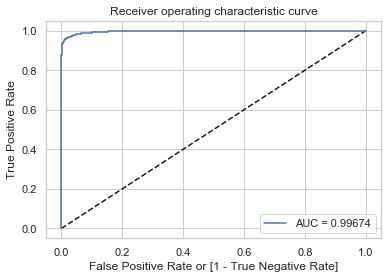

In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# predict probabilities
probs = rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], 'k--')

# plot the roc curve for the model
#plt.plot(fpr, tpr,)
plt.plot(fpr, tpr, label ='AUC = %0.5f' %auc )
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')

# show the plot
plt.show()

In [67]:
feat_importance = rf.feature_importances_

Text(0, 0.5, 'Relative Importance')

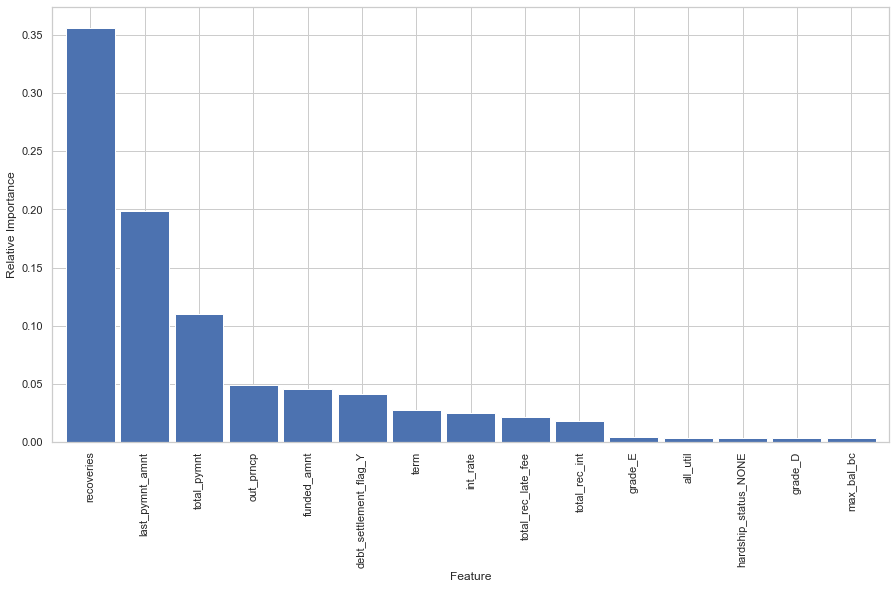

In [68]:
r = pd.DataFrame(columns=['Feature','Importance'])
ncomp = 15
r['Feature'] = feat_labels = X_train.columns
r['Importance'] = rf.feature_importances_
r.set_index(r['Feature'], inplace=True)
ax = r.sort_values('Importance', ascending=False)[:ncomp].plot.bar(width=0.9, legend=False, figsize=(15,8))
ax.set_ylabel('Relative Importance')

In [ ]:
### Predicting fro current values

In [69]:
df_current = df_current.drop(['loan_status'],1)

In [70]:
df_current.shape

(78245, 79)

In [71]:
categorical_columns = ['grade','home_ownership','verification_status','pymnt_plan',
                       'purpose','addr_state','application_type','hardship_flag','hardship_status','debt_settlement_flag']
current_ones = pd.get_dummies(data = df_current, prefix = None, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [72]:
current_ones.shape

(78245, 147)

In [73]:
X_test.shape

(24050, 150)

In [75]:
X_test.head()

,funded_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Joint App,hardship_flag_Y,hardship_status_BROKEN,hardship_status_COMPLETED,hardship_status_NONE,debt_settlement_flag_Y
188028,25000.0,60,25.81,2,165000.0,7.83,2.0,1.0,9.0,7.0,0.0,18387.0,60.4,31.0,22461.2,8650.07000,6073.98,37.29,0.0,483.11,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,17867.0,71.0,0.0,1.0,8184.0,67.0,25400.0,1.0,0.0,3.0,2.0,52282.0,6013.0,64.0,0.0,0.0,101.0,141.0,14.0,1.0,2.0,92.0,1.0,0.0,3.0,3.0,3.0,16.0,5.0,4.0,24.0,0.0,0.0,0.0,1.0,96.6,66.7,0.0,0.0,431339.0,24400.0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
114262,16900.0,36,19.99,2,45000.0,30.80,0.0,1.0,31.0,14.0,0.0,12996.0,45.4,18.0,0.0,17031.38000,131.38,0.00,0.0,17068.92,0.0,0.0,784.0,3.0,2.0,1.0,3.0,4.0,52733.0,91.0,6.0,11.0,3417.0,76.0,28600.0,2.0,2.0,4.0,15.0,13721.0,9881.0,56.7,0.0,0.0,128.0,65.0,4.0,4.0,1.0,4.0,4.0,0.0,6.0,7.0,6.0,8.0,4.0,11.0,13.0,0.0,0.0,0.0,8.0,100.0,16.7,0.0,0.0,214285.0,22800.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
125458,20000.0,60,15.99,10,50000.0,19.08,0.0,0.0,50.0,6.0,0.0,18017.0,61.3,21.0,0.0,23893.47153,3893.47,0.00,0.0,16617.34,0.0,0.0,156.0,0.0,1.0,0.0,0.0,40.0,10177.0,48.0,0.0,2.0,18017.0,56.0,29400.0,0.0,0.0,0.0,4.0,34031.0,5883.0,75.4,0.0,0.0,156.0,260.0,16.0,16.0,7.0,16.0,16.0,0.0,1.0,1.0,2.0,4.0,5.0,4.0,9.0,0.0,0.0,0.0,0.0,95.2,50.0,0.0,0.0,232158.0,23900.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
37767,15000.0,36,12.99,7,163000.0,6.99,1.0,0.0,21.0,15.0,0.0,12922.0,61.0,47.0,0.0,17609.25003,2609.25,0.00,0.0,7502.45,0.0,0.0,203.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2120

In [76]:
current_ones.head()

,funded_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Joint App,hardship_flag_Y,hardship_status_BROKEN,hardship_status_COMPLETED,hardship_status_NONE,debt_settlement_flag_Y
23145,14125.0,60,18.54,8,80000.0,26.36,0.0,1.0,31.0,7.0,1.0,4681.0,64.1,10.0,2063.56,19564.80,7503.36,0.0,0.0,362.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7300.0,0.0,0.0,0.0,6.0,10752.0,319.0,93.6,0.0,0.0,90.0,84.0,11.0,11.0,0.0,11.0,5.0,0.0,2.0,2.0,2.0,3.0,6.0,3.0,4.0,0.0,0.0,0.0,1.0,100.0,100.0,1.0,0.0,103643.0,5000.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
23168,17000.0,60,15.61,4,40000.0,21.51,0.0,1.0,51.0,12.0,0.0,14873.0,75.9,24.0,803.42,23774.20,7577.62,0.0,0.0,409.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19600.0,0.0,0.0,0.0,7.0,12816.0,1880.0,83.4,0.0,0.0,111.0,291.0,6.0,6.0,3.0,20.0,3.0,2.0,2.0,5.0,3.0,11.0,2.0,9.0,19.0,0.0,0.0,0.0,2.0,91.7,66.7,0.0,0.0,210742.0,11300.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
23176,15000.0,60,14.49,10,114000.0,10.79,0.0,0.0,42.0,14.0,3.0,17380.0,70.9,22.0,1701.77,19406.75,6108.52,0.0,0.0,352.85,0.0,0.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24500.0,0.0,0.0,0.0,4.0,4089.0,1571.0,91.4,0.0,0.0,108.0,228.0,9.0,7.0,0.0,13.0,0.0,1.0,6.0,8.0,7.0,10.0,4.0,11.0,18.0,0.0,0.0,0.0,2.0,81.8,100.0,0.0,3.0,57218.0,18200.0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
23205,19225.0,60,17.57,10,75000.0,15.43,0.0,2.0,35.0,11.0,0.0,8702.0,31.0,29.0,945.91,28055.18,9776.09,0.0,0.0,483.71,0.0,0.0,792.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28100.0,0.0,0.0,0.0,4.0,11414.0,2799.0,36.4,0.0,0.0,157.0,169.0,1.0,1.0,0.0,21.0,1.0,1.0,2.0,5.0,2.0,2.0,17.0,8.0,11.0,0.0,0.0,

In [77]:
current_ones['home_ownership_NONE'] = 0
current_ones['home_ownership_OTHER'] = 0 
current_ones['purpose_wedding']=0

In [78]:
current_ones.shape

(78245, 150)

In [79]:
current_ones_predict = rf.predict(current_ones)

In [80]:
#probability value
probs = rf.predict_proba(current_ones)

In [81]:
current_ones['risk_categorization'] = current_ones_predict
df_current['risk_categorization'] = current_ones_predict

In [82]:
probs[:,1]

array([0.70249841, 0.7079404 , 0.73511378, ..., 0.9294536 , 0.90726122,
       0.8426704 ])

In [83]:
current_ones['probability_value'] = probs[:,1]
df_current['probability_value'] = probs[:,1]

In [84]:
df_current.head(5)

,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,hardship_flag,hardship_status,debt_settlement_flag,risk_categorization,probability_value
23145,14125.0,60,18.54,E,8,MORTGAGE,80000.0,Not Verified,n,home_improvement,NC,26.36,0.0,1.0,31.0,7.0,1.0,4681.0,64.1,10.0,2063.56,19564.80,7503.36,0.0,0.0,362.85,0.0,Individual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7300.0,0.0,0.0,0.0,6.0,10752.0,319.0,93.6,0.0,0.0,90.0,84.0,11.0,11.0,0.0,11.0,5.0,0.0,2.0,2.0,2.0,3.0,6.0,3.0,4.0,0.0,0.0,0.0,1.0,100.0,100.0,1.0,0.0,103643.0,5000.0,N,NONE,N,1,0.702498
23168,17000.0,60,15.61,D,4,MORTGAGE,40000.0,Not Verified,n,debt_consolidation,IN,21.51,0.0,1.0,51.0,12.0,0.0,14873.0,75.9,24.0,803.42,23774.20,7577.62,0.0,0.0,409.90,0.0,Individual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19600.0,0.0,0.0,0.0,7.0,12816.0,1880.0,83.4,0.0,0.0,111.0,291.0,6.0,6.0,3.0,20.0,3.0,2.0,2.0,5.0,3.0,11.0,2.0,9.0,19.0,0.0,0.0,0.0,2.0,91.7,66.7,0.0,0.0,210742.0,11300.0,N,NONE,N,1,0.707940
23176,15000.0,60,14.49,C,10,OWN,114000.0,Source Verified,n,home_improvement,NY,10.79,0.0,0.0,42.0,14.0,3.0,17380.0,70.9,22.0,1701.77,19406.75,6108.52,0.0,0.0,352.85,0.0,Individual,0.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24500.0,0.0,0.0,0.0,4.0,4089.0,1571.0,91.4,0.0,0.0,108.0,228.0,9.0,7.0,0.0,13.0,0.0,1.0,6.0,8.0,7.0,10.0,4.0,11.0,18.0,0.0,0.0,0.0,2.0,81.8,100.0,0.0,3.0,57218.0,18200.0,N,NONE,N,1,0.735114
23205,19225.0,60,17.57,D,10,RENT,75000.0,Not Verified,n,debt_consolidation,VA,15.43,0.0,2.0,35.0,11.0,0.0,8702.0,31.0,29.0,945.91,28055.18,9776.09,0.0,0.0,483.71,0.0,Individual,0.0,792.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28100.0,0.0,0.0,0.0,4.0,11414.0,2799.0,36.4,0.0,0.0,157.0,169.0,1.0,1.0,0.0,21.0,1.0,1.0,2.0,5.0,2.0,2.0,17.0,8.0,11.0,0.0,0.0,0.0,1.0,96.3,0.0,0.0,0.0,131032.0,4400.0,N,NONE,N,1,0.744296
23269,16575.0,60,15.61,D,7,RENT,39500.0,Source Verified,n,debt_consolidation,MA,18.63,0.0,0.0,31.0,13.0,0.0,14263.0,52.8,24.0,783.55,23179.70,7388.25,0.0,0.0,399.65,0.0,Individual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27000.0,0.0,0.0,0.0,0.0,2531.0,12603.0,50.0,0.0,0.0,214.0,188.0,40.0,40.0,0.0,40.0,0.0,0.0,3.0,5.0,5.0,11.0,9.0,7.0,15.0,0.0,0.0,0.0,0.0,100.0,75.0,0.0,0.0,48302.0,25200.0,N,NONE,N,1,0.732806


In [85]:
df_current['risk_categorization'].value_counts()

1    77869
0      376
Name: risk_categorization, dtype: int64

### Calculate Best intrest rate for reducing the risk of hedge Involved

In [87]:
df_current['best_int_rate'] = df_current['int_rate'] + df_current['int_rate']*df_current['probability_value']

In [88]:
Report = df_current[['funded_amnt','int_rate','risk_categorization','probability_value','best_int_rate']]

In [91]:
Report.head(25)

,funded_amnt,int_rate,risk_categorization,probability_value,best_int_rate
23145,14125.0,18.54,1,0.702498,31.564321
23168,17000.0,15.61,1,0.707940,26.660950
23176,15000.0,14.49,1,0.735114,25.141799
23205,19225.0,17.57,1,0.744296,30.647283
23269,16575.0,15.61,1,0.732806,27.049107
23345,15000.0,14.99,1,0.687514,25.295834
23363,20050.0,14.99,1,0.731005,25.947771
23391,25250.0,20.99,1,0.713856,35.973845
23399,11225.0,13.98,1,0.728847,24.169281
23419,25000.0,18.24,1,0.734467,31.636686


In [92]:
Report.tail(25)

,funded_amnt,int_rate,risk_categorization,probability_value,best_int_rate
237605,35000.0,13.90,1,0.858325,25.830713
237606,20000.0,16.14,1,0.926907,31.100277
237608,18000.0,28.80,1,0.947547,56.089354
237609,14000.0,8.81,1,0.878757,16.551848
237610,24000.0,11.80,1,0.903472,22.460967
237611,2000.0,7.02,1,0.794835,12.599743
237613,10000.0,20.89,1,0.921372,40.137461
237614,14000.0,7.56,1,0.854946,14.023388
237615,15000.0,14.74,1,0.849804,27.266117
237617,11000.0,16.14,1,0.891839,30.534280
